# **Sub-Octave Steerable Pyramids**

This notebook shows how to build both regular and smooth sub-octave Complex Steerable Pyramids

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from steerable_pyramid import SteerablePyramid, SuboctaveSP

%matplotlib inline

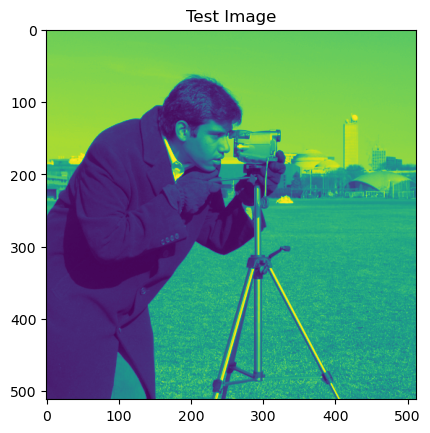

In [2]:
from skimage.data import camera

image = camera()

plt.imshow(image)
plt.title("Test Image");

Get Maximum Depth for reference

In [21]:
max_depth = int(np.floor(np.log2(np.min(np.array(image.shape)))) - 2)
print(f"Max Depth: {max_depth}")

Max Depth: 7


Choose Regular Complex or Smooth Sub-Octave Complex Steerable Pyramid

In [22]:
pyr_type = 'smooth' # 'regular'

In [46]:
if pyr_type == 'regular':
    pyr = SteerablePyramid(depth=74, orientations=8, filters_per_octave=2, twidth=0.75, complex_pyr=True)
else: 
    pyr = SuboctaveSP(depth=4, orientations=8, filters_per_octave=4, cos_order=6, complex_pyr=True)

In [47]:
# get Steerable Pyramid Filters
h, w = image.shape
filters, crops = pyr.get_filters(h, w, cropped=True)

# get Steerable Pyramid Decomposition
pyramid = pyr.build_pyramid(image, filters, crops)

# reconstruct original image DFT from pyramid decomposition
recon_dft = pyr.reconstruct_image_dft(pyramid, filters, crops)

## Display Results

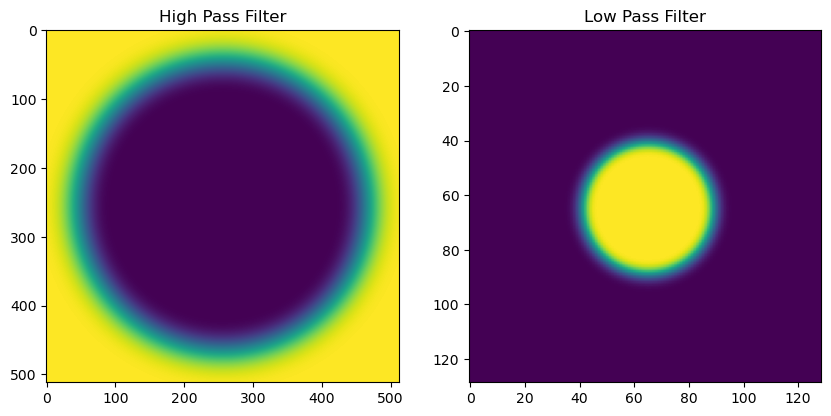

In [48]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(filters[0]);
ax[0].set_title("High Pass Filter");

ax[1].imshow(filters[-1]);
ax[1].set_title("Low Pass Filter");

### Visualize the Transition Regiond of the HPF

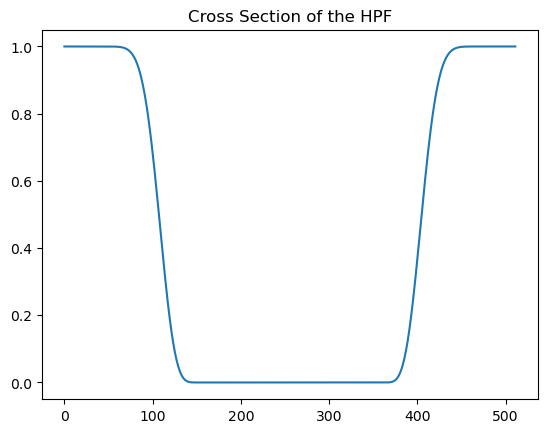

In [49]:
plt.plot(np.diag(filters[0]));
plt.title("Cross Section of the HPF");

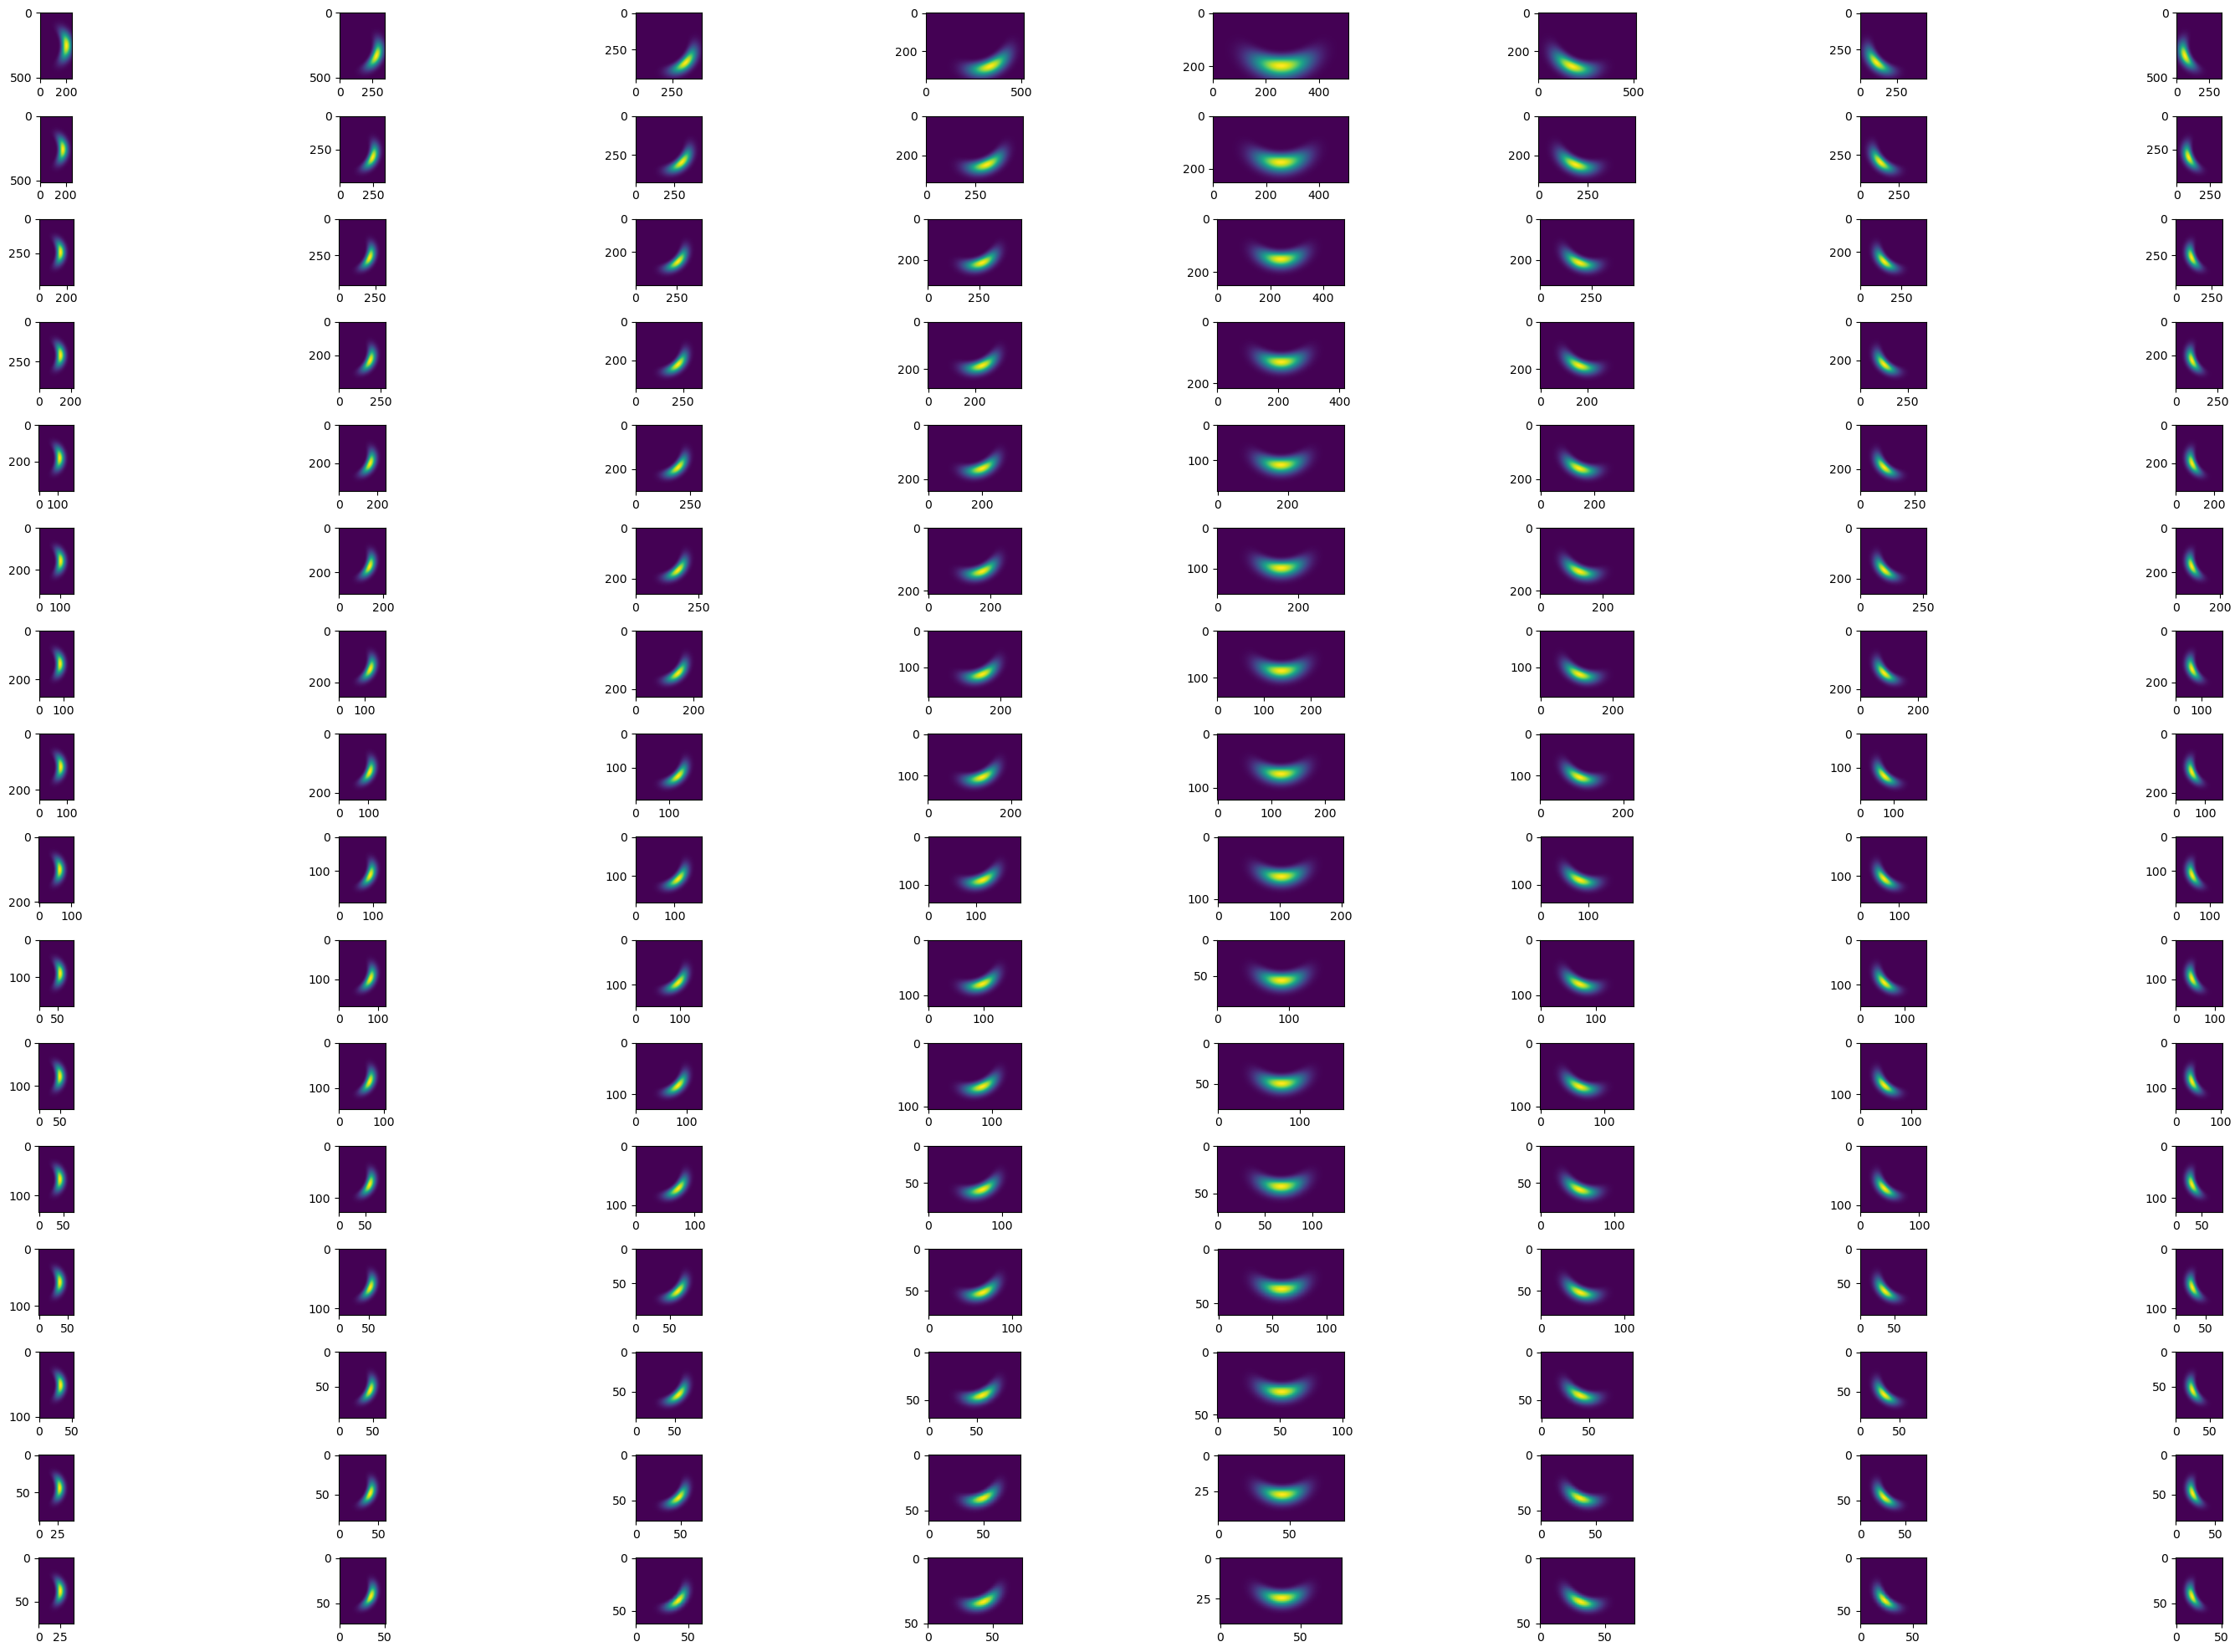

In [50]:
pyr.display(filters);

In [51]:
magnitude_pyramid = [np.abs(pyr) for pyr in pyramid]
phase_pyramid = [np.angle(pyr) for pyr in pyramid]

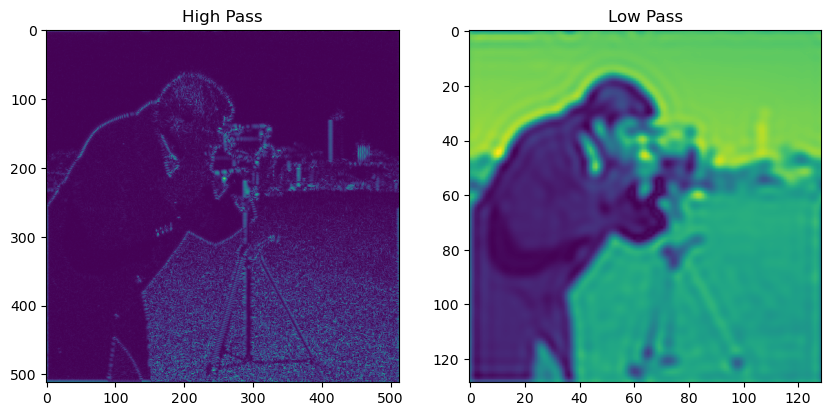

In [52]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.abs(pyramid[0]));
ax[0].set_title("High Pass");

ax[1].imshow(np.abs(pyramid[-1]));
ax[1].set_title("Low Pass");

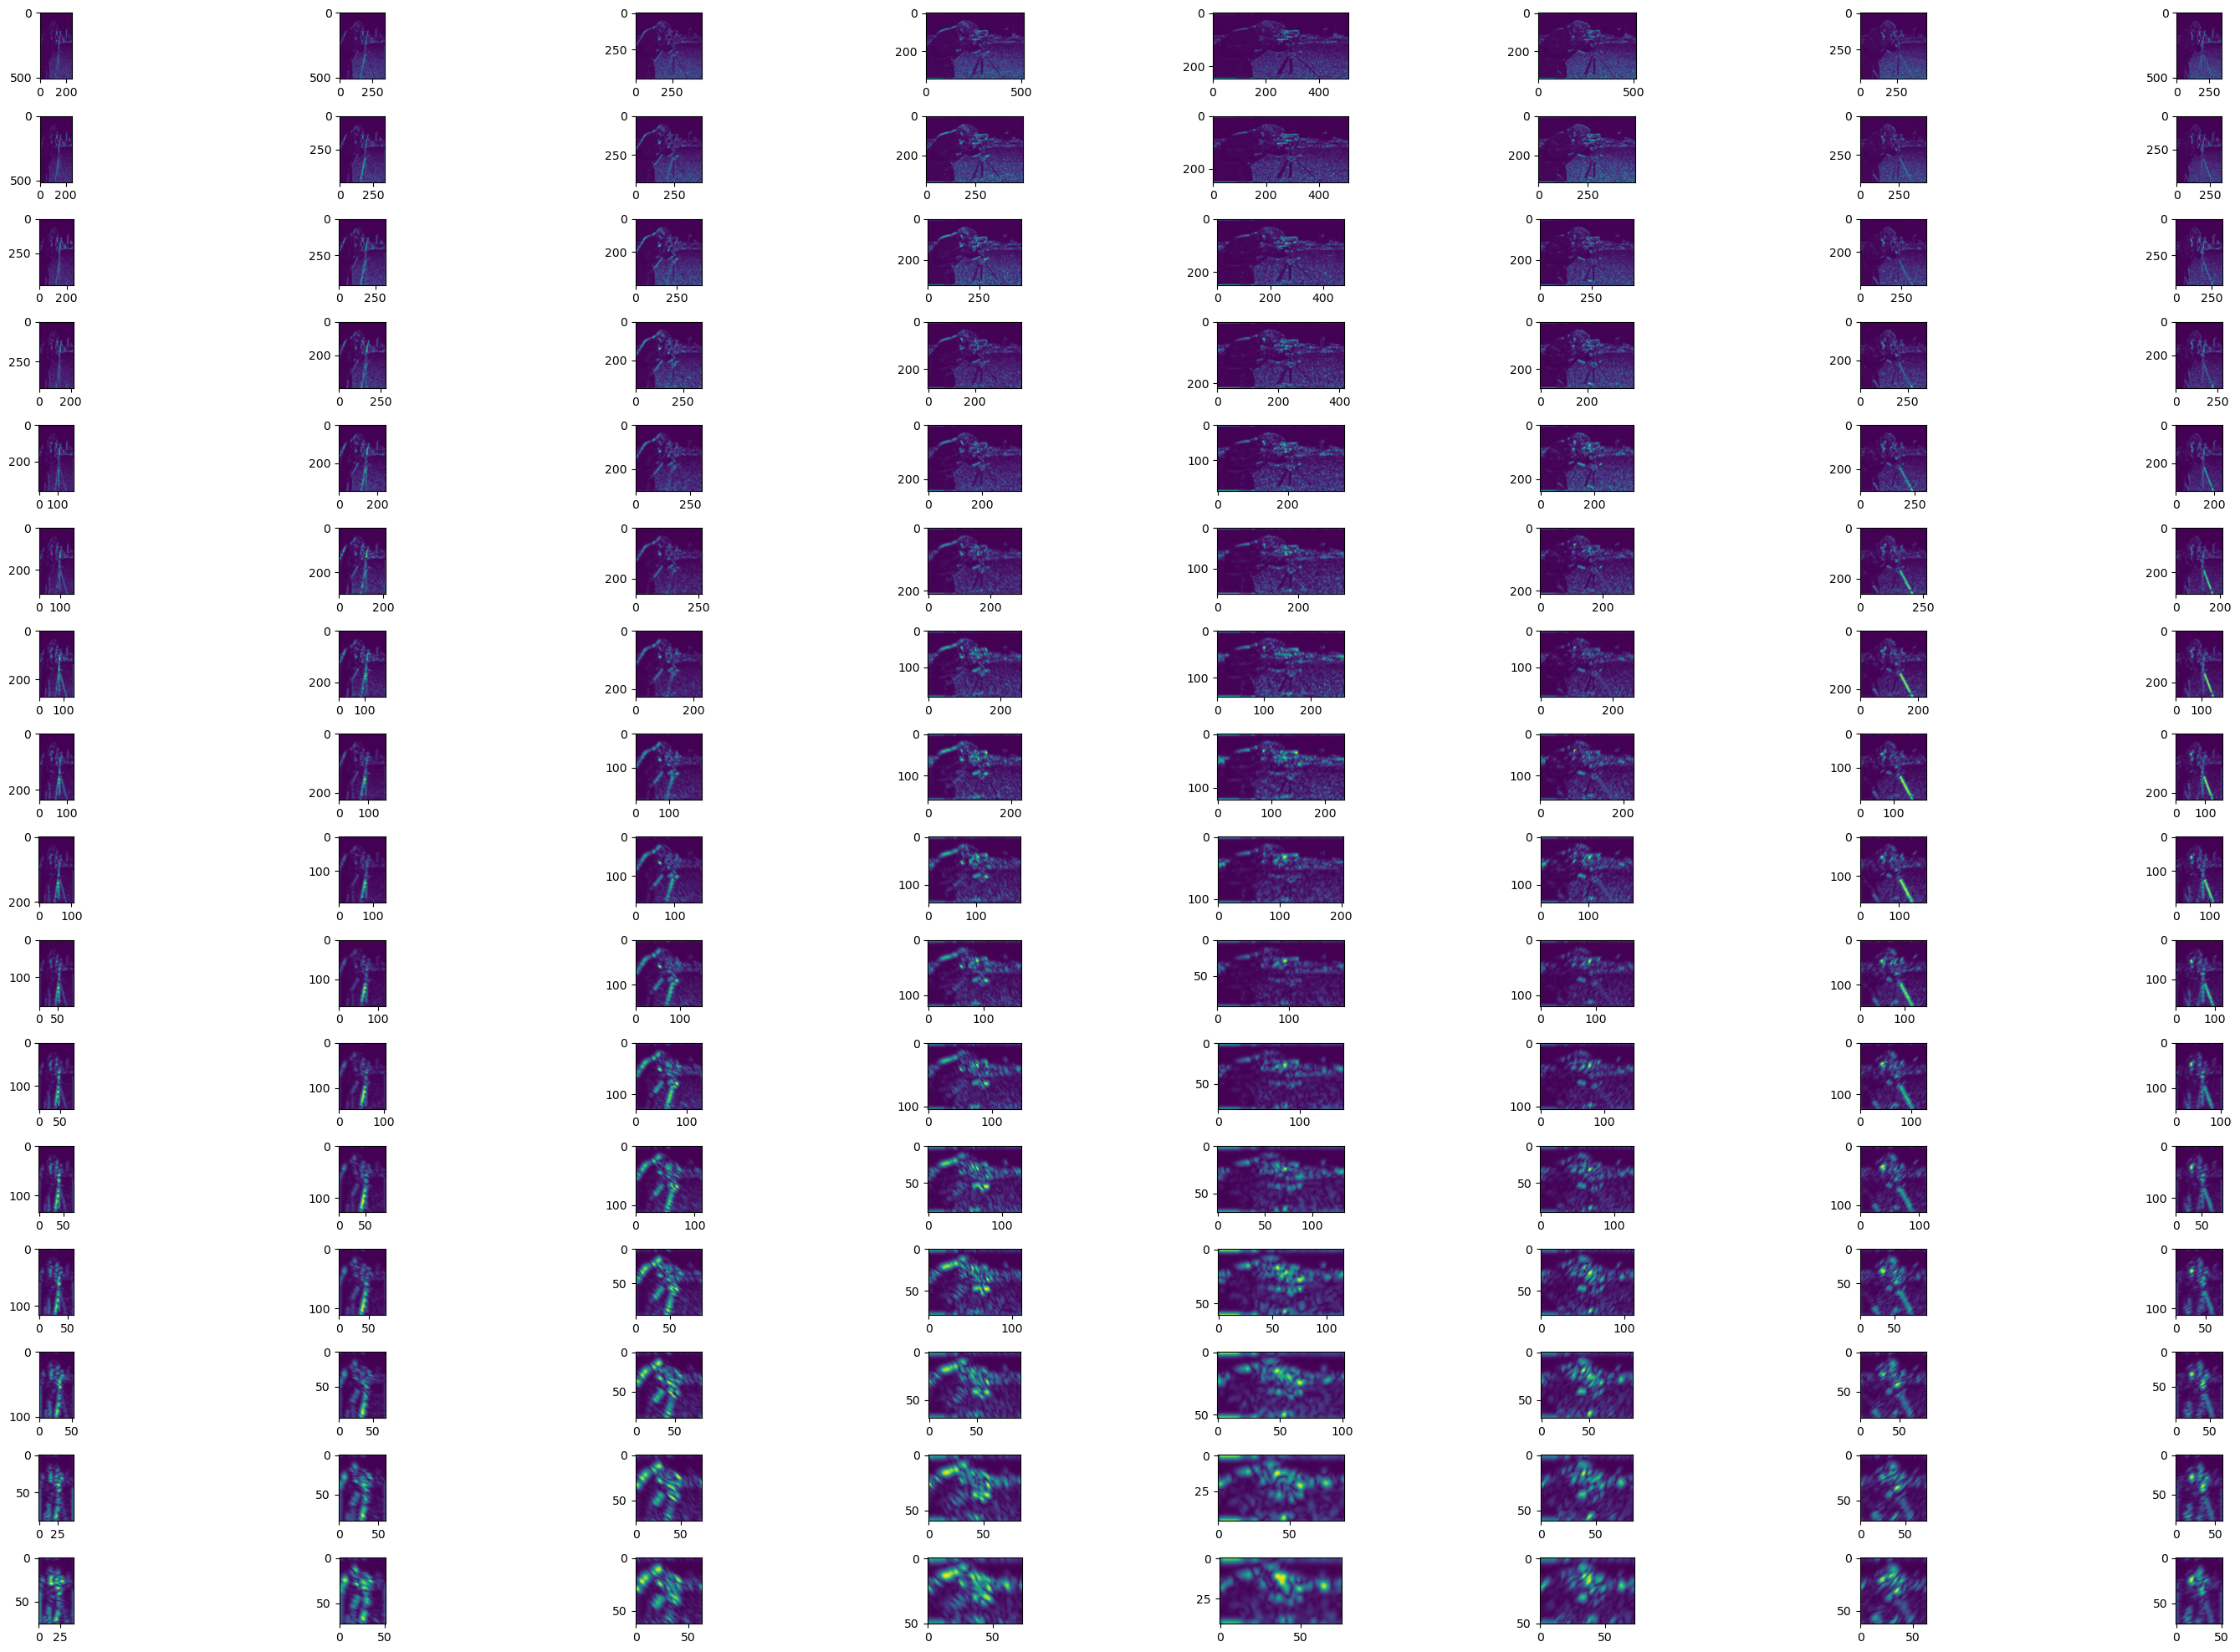

In [53]:
pyr.display(magnitude_pyramid);

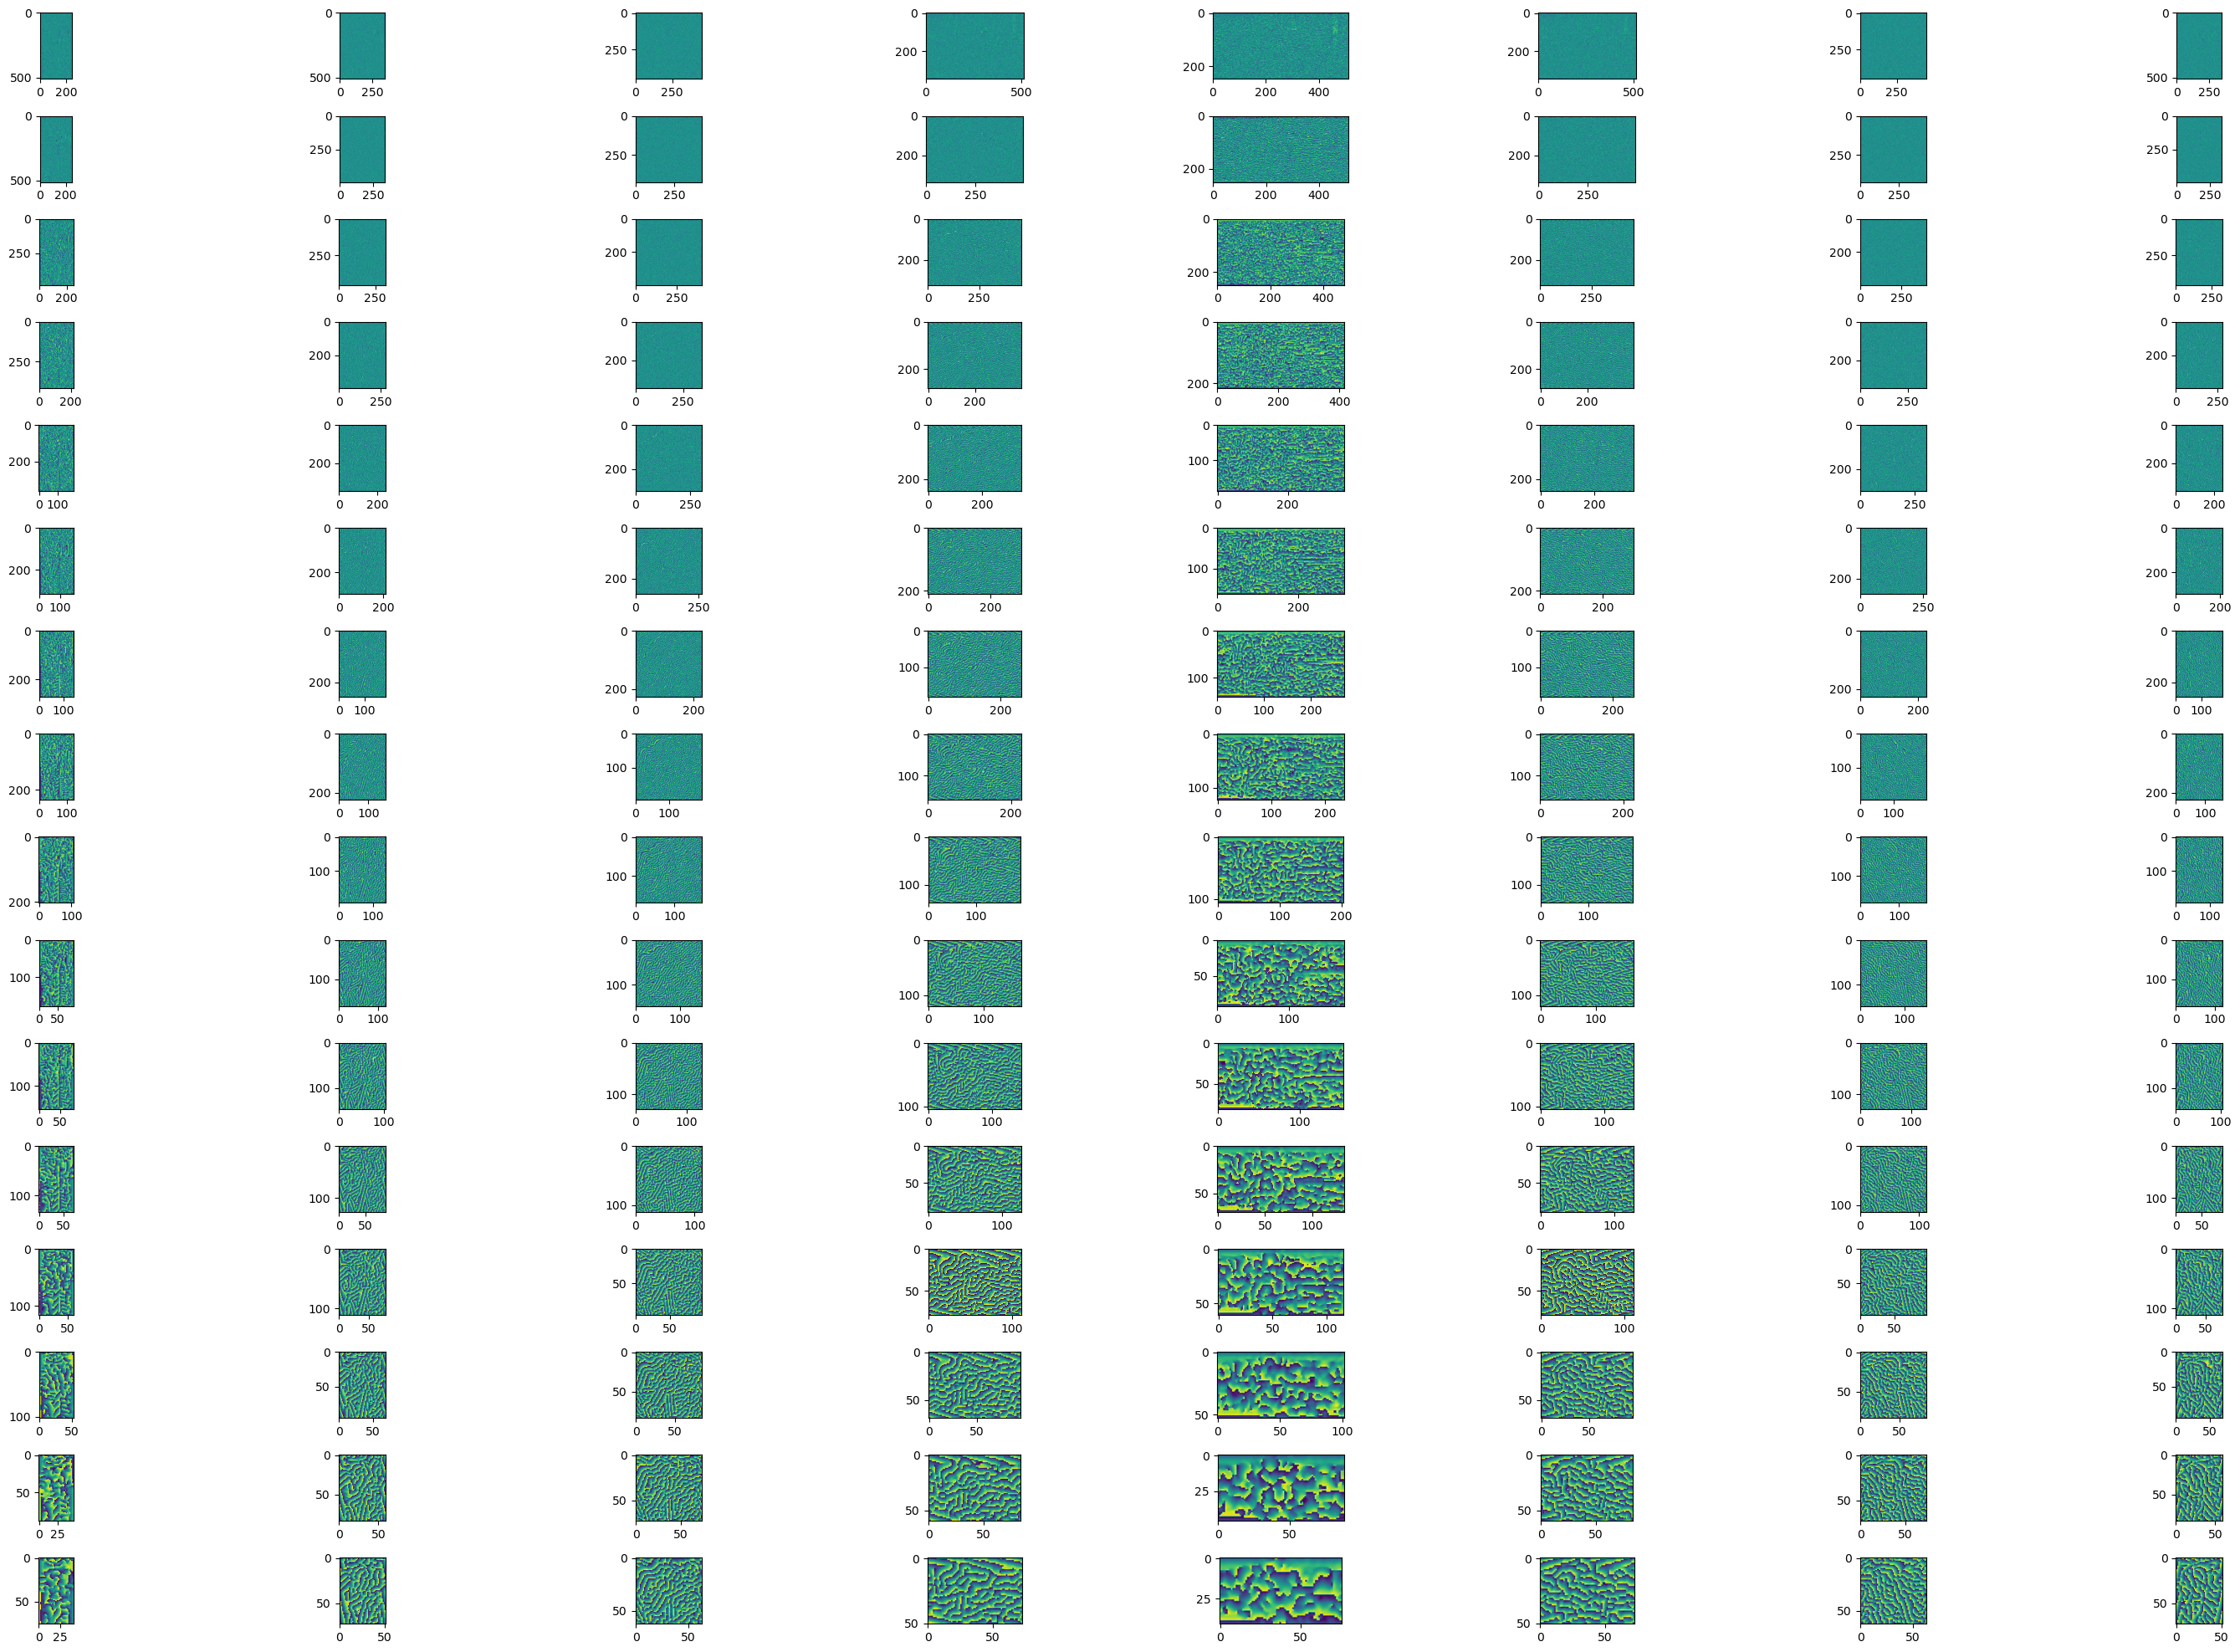

In [54]:
pyr.display(phase_pyramid);

In [55]:
image_dft = np.fft.fftshift(np.fft.fft2(image))

C:\Users\itber\AppData\Local\Temp\ipykernel_27828\3027074505.py:5: RuntimeWarning: divide by zero encountered in log
  ax[1].imshow(np.log(np.abs(recon_dft)));


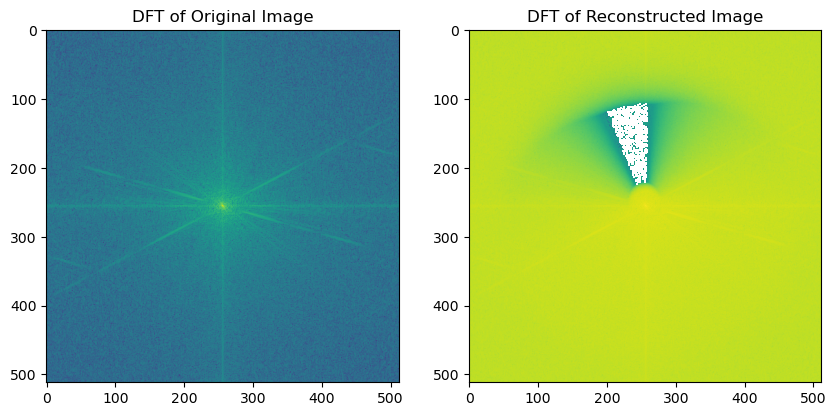

In [56]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.log(np.abs(image_dft)));
ax[0].set_title("DFT of Original Image");

ax[1].imshow(np.log(np.abs(recon_dft)));
ax[1].set_title("DFT of Reconstructed Image");

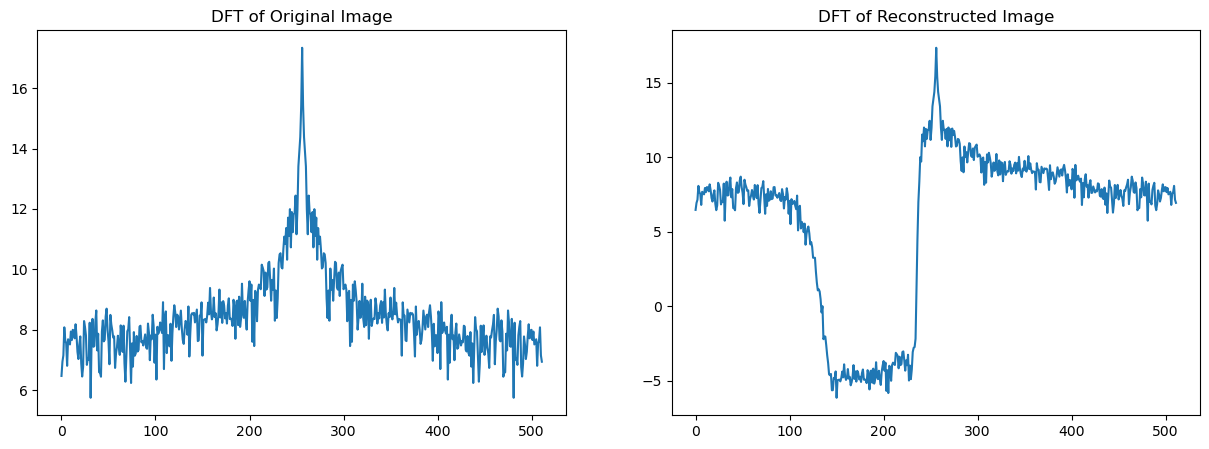

In [57]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.log(np.abs( np.diag(image_dft) )));
ax[0].set_title("DFT of Original Image");

ax[1].plot(np.log(np.abs( np.diag(recon_dft) )));
ax[1].set_title("DFT of Reconstructed Image");

In [58]:
recon = np.fft.ifft2(np.fft.ifftshift(recon_dft)).real

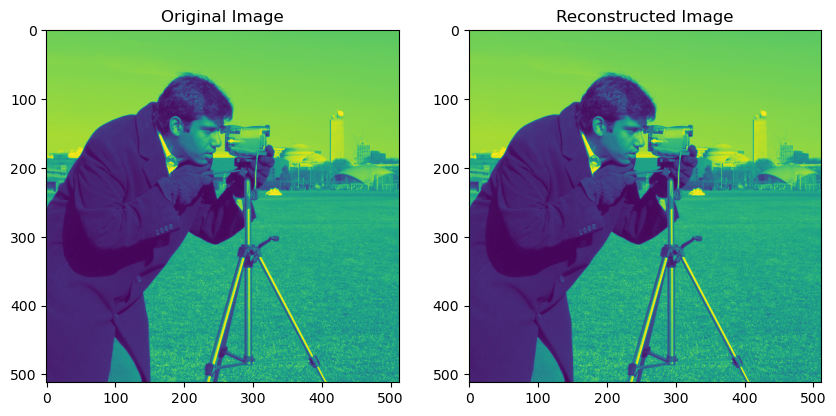

In [64]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image);
ax[0].set_title("Original Image");

ax[1].imshow(recon);
ax[1].set_title("Reconstructed Image");

Inspect reconstruction errors

In [65]:
np.sum(np.abs(recon - image)), np.mean(np.square(recon - image)) 

(1534.5232098861247, 5.57907232497986e-05)

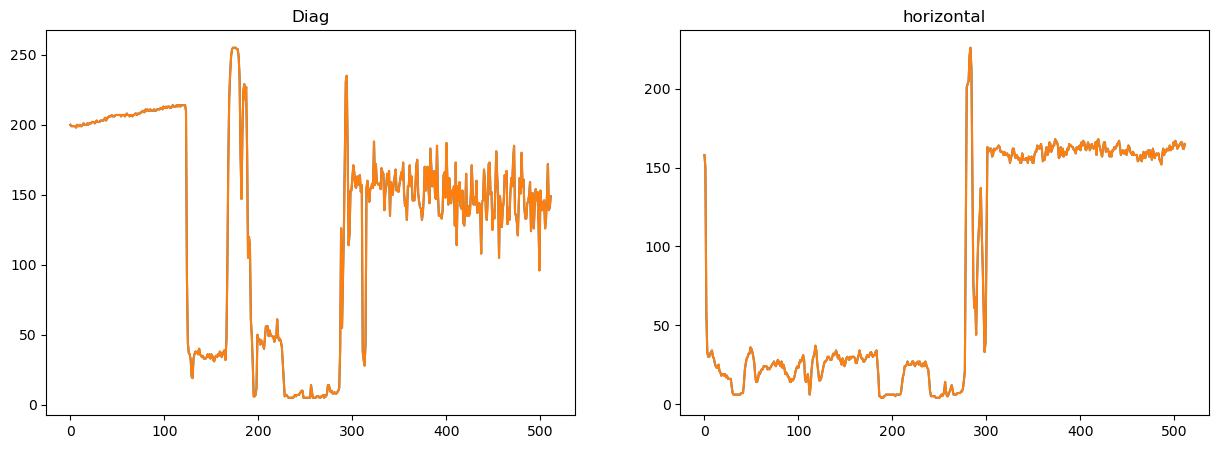

In [66]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.diag(image));
ax[0].plot(np.diag(recon))
ax[0].set_title("Diag");

ax[1].plot(image[256, :]);
ax[1].plot(recon[256, :])
ax[1].set_title("horizontal");